## Linear Regression

### Absolute Trick

$y = w_1 x + w_2$

above the line: $y = (w_1+p*\alpha)x + (w_2+\alpha)$

below the line: $y = (w_1-p*\alpha)x + (w_2-\alpha)$

Let's say that we have a line whose equation is y = -0.6x + 4. For the point (x,y) = (-5, 3), apply the absolute trick to get the new equation for the line, using a learning rate of alpha = 0.1alpha=0.1.

Report your answer in the form y = w_1x + w_2, substituting appropriate values for w_1 and w_2.

In [3]:
-.6-(-5*.1)

-0.09999999999999998

$y = -0.1x + 3.9$

### Square Trick

$y = (w_1+p*(q-q')\alpha)x + (w_2+(q-q')\alpha)$

Let's say that we have a line whose equation is y = -0.6x + 4. For the point (x,y) = (-5, 3), apply the square trick to get the new equation for the line, using a learning rate of alpha = 0.01alpha=0.01.

Report your answer in the form y = w_1x + w_2, substituting appropriate values for w_1 and w_2.

In [4]:
-5*-0.6+4

7.0

In [7]:
-.6+(-5*.01*(3-7))

-0.39999999999999997

In [8]:
4+(.01*(3-7))

3.96

y = -0.4x + 3.96

### Gradient Descent

$w_i \to w_i-\alpha\frac{\partial}{\partial w_i}Error$

###  Mean Absolute Error

$Error = \frac{1}{m}\sum\limits_{i=1}^m |y-\hat{y}|$

Compute the mean absolute error for the following line and points:

line: y = 1.2x + 2

points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)

In [5]:
m = 5
points = [(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]
sum_f = lambda x,y: abs((1.2*x+2)-y)
1/m*(sum([sum_f(x,y) for x, y in points]))

3.88

### Mean Squared Error

$Error = \frac{1}{2m}\sum\limits_{i=1}^m (y-\hat{y})^2$

Compute the mean squared error for the following line and points:

line: y = 1.2x + 2

points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)

In [7]:
m = 5
points = [(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]
sum_f = lambda x,y: ((1.2*x+2)-y)**2
1/(2*m)*(sum([sum_f(x,y) for x, y in points]))

10.692000000000002

### Batch Gradient Descent

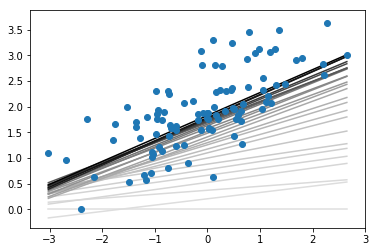

In [3]:
%matplotlib inline

import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)


# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.001):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

# perform gradient descent
data = np.loadtxt('data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]
regression_coef = miniBatchGD(X, y)

# plot the results
import matplotlib.pyplot as plt

plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()

### Single Linear Regression

In [6]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([[21.07931]])
print(laos_life_exp)

[[60.31564716]]


### Multiple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and Assign it to the model variable
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)
print(prediction)

[23.68284712]


### Polynomial Regression

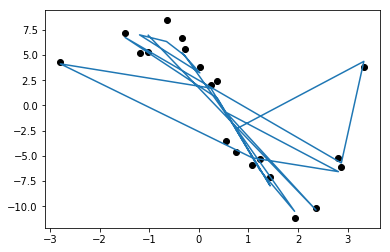

In [35]:
%matplotlib inline

# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('poly_data.csv')
X = train_data['Var_X'].values.reshape(-1, 1)
y = train_data['Var_Y'].values

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)


# Plot outputs
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='black')
plt.plot(X,poly_model.predict(poly_feat.fit_transform(X)))

plt.show()

### Regularization

In [41]:
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('reg_data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the standardization scaling object.
scaler = StandardScaler()

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

# TODO: Create the linear regression model with lasso regularization.
lin_reg = LinearRegression()
lasso_reg = Lasso()
std_lasso_reg = Lasso()

# TODO: Fit the model.
lin_reg.fit(X, y)
lasso_reg.fit(X, y)
std_lasso_reg.fit(X_scaled, y)

# TODO: Retrieve and print out the coefficients from the regression model.
print(lin_reg.coef_)
print(lasso_reg.coef_)
print(std_lasso_reg.coef_)

[-6.19918532e-03  2.96325160e+00  1.98199191e+00 -7.86249920e-02
 -3.95818772e+00  9.30786141e+00]
[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]
[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]
